# Практическое занятие №3

*П.Н. Советов, РТУ МИРЭА*

## 1. Модули

**1.1.** (уровень сложности: простейший)

Напишите код, состоящий из двух модулей, для получения следующего сообщения об ошибке:

```
AttributeError: partially initialized module '...' has no attribute '...' (most likely due to a circular import)
```

**1.2.** (уровень сложности: простейший)

Как вы думаете, модуль загружается один раз или же загружается каждый раз при очередном импорте? Докажите правильность вашей гипотезы примером кода.

**1.3.** (уровень сложности: простейший)

Предположим, мы хотим изменить значение глобальной переменной модуля, но так, чтобы новое значение отразилось на всех пользователях этого модуля. К чему приведет следующий код? Что можно предложить взамен?

```Python
from some_module import GLOBAL_VAR
GLOBAL_VAR = 42
```

**1.4.** (уровень сложности: простейший)

Неконтролируемый импорт с помощью *, как известно, в Питоне не поощряется. Попробуйте сделать его контролируемым со стороны модуля. Использование звездочки не должно приводить к импорту всех глобальных имен вашего модуля.

**1.5.** (уровень сложности: низкий)

Напишите функцию load_config(filename) для загрузки скрипта на Питоне в виде программируемого конфигурационного формата. Приведите плюсы и минусы подходов с использованием импорта и прямого выполнения кода.

**1.6.** (уровень сложности: средний)

Создайте учебный пакет, состоящий из нескольких модулей и JSON-файла. Получите дистрибутив, готовый для установки с помощью pip. Проверьте результат установки в виртуальном окружении.

**Все дальнейшие задачи делаются в Jupyter-блокноте с использованием библиотеки Matplotlib.**

## 2. Процедурная графика

**2.1.** (уровень сложности: средний)

Создайте генератор случайных спрайтов 5x5 пикселей. Используйте свойство симметрии. Вывод реализуйте с помощью функции imshow.

Пример работы генератора показан ниже.

![](data/sprite1.png)

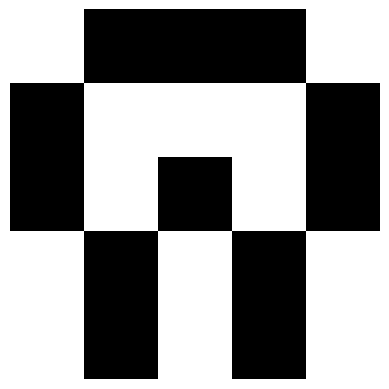

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def generate_sprite(size=5):
    sprite = np.zeros((size, size))
    
    # Заполняем левую половину случайными значениями
    for i in range(size):
        for j in range((size + 1) // 2):
            sprite[i, j] = np.random.choice([0, 1])
    
    # Зеркально копируем левую половину в правую для симметрии
    sprite[:, size//2 + 1:] = sprite[:, :size//2][:, ::-1]
    
    return sprite

sprite = generate_sprite()

plt.imshow(sprite, cmap='gray')
plt.axis('off')
plt.show()


**2.2.** (уровень сложности: средний)

Создайте генератор карт спрайтов. Пример работы этого генератора показан ниже.


![](data/sprite2.png)

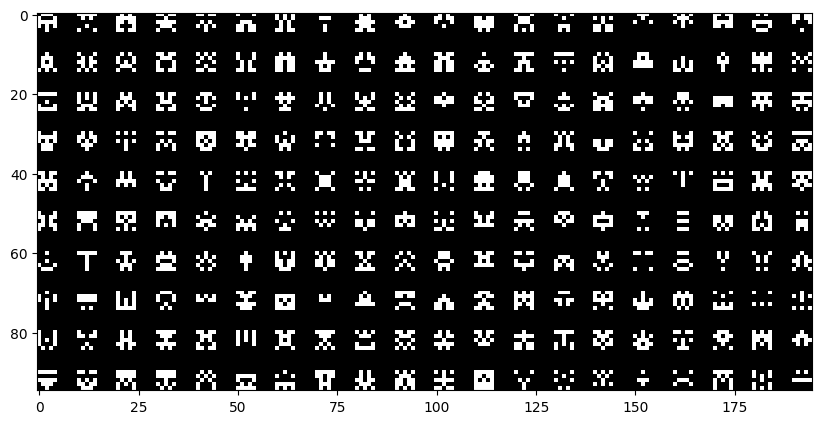

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def generate_sprite(size=5):
    sprite = np.zeros((size, size))
    for i in range(size):
        for j in range((size + 1)//2):
            sprite[i, j] = np.random.choice([0, 1])
    sprite[:, size//2+1:] = sprite[:, :size//2][:, ::-1]
    return sprite

def generate_sprite_map(rows, cols, sprite_size=5, padding=2):
    map_height = rows * (sprite_size + padding) - padding
    map_width = cols * (sprite_size + padding) - padding
    sprite_map = np.zeros((map_height, map_width))
    
    for row in range(rows):
        for col in range(cols):
            sprite = generate_sprite(sprite_size)
            top = row * (sprite_size + padding)
            left = col * (sprite_size + padding)
            sprite_map[top:top+sprite_size, left:left+sprite_size] = sprite
            
    return sprite_map

sprite_map = generate_sprite_map(rows=10, cols=20, sprite_size=5, padding=5)

plt.figure(figsize=(10, 5))
plt.imshow(sprite_map, cmap='gray')
plt.axis('on')
plt.show()


**2.3.** (уровень сложности: высокий)

Реализуйте генератор случайных спрайтов NxM. Используйте различные свойства симметрии. Добавьте цвета.

Пример работы этого генератора показан ниже.


![](data/sprite3.png)

Использовалась палитра из PICO-8:

```
1D2B53
7E2553
008751
AB5236
5F574F
C2C3C7
FFF1E8
FF004D
FFA300
FFEC27
00E436
29ADFF
83769C
FF77A8
FFCCAA
```

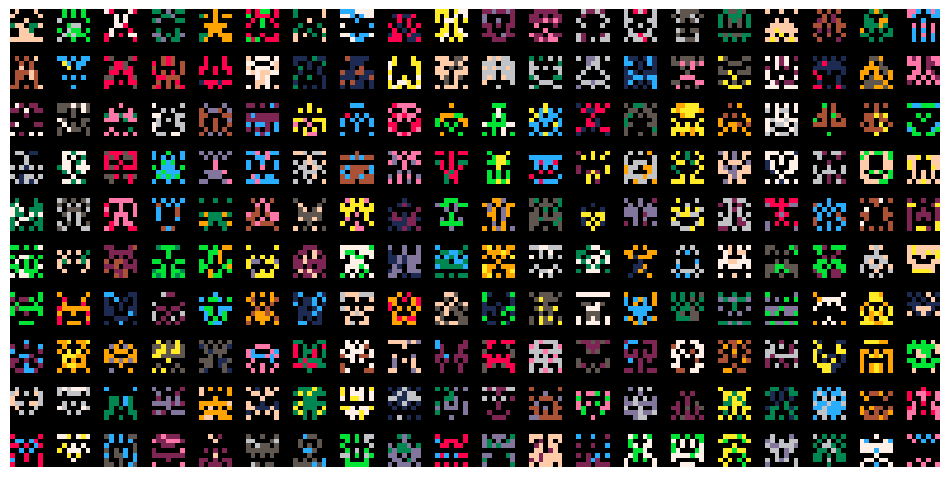

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Палитра цветов PICO-8
pico8_palette = [
    "#1D2B53", "#7E2553", "#008751", "#AB5236",
    "#5F574F", "#C2C3C7", "#FFF1E8", "#FF004D",
    "#FFA300", "#FFEC27", "#00E436", "#29ADFF",
    "#83769C", "#FF77A8", "#FFCCAA"
]

def generate_sprite(size=5):
    sprite = np.zeros((size, size), dtype=int)
    half = (size + 1) // 2
    for i in range(size):
        for j in range(half):
            sprite[i, j] = np.random.choice([0, 1])
    sprite[:, half:] = np.fliplr(sprite[:, :size//2])
    return sprite

def apply_texture(sprite, primary_color, secondary_color):
    size = sprite.shape[0]
    colored_sprite = np.zeros_like(sprite)
    for i in range(size):
        for j in range(size):
            if sprite[i, j]:
                # Создаем текстуру: случайно выбираем основной или дополнительный цвет
                colored_sprite[i, j] = np.random.choice([primary_color, secondary_color], p=[0.7, 0.3])
    return colored_sprite

def generate_textured_sprite(size=5, palette=pico8_palette):
    sprite_pattern = generate_sprite(size)
    primary_color, secondary_color = np.random.choice(range(1, len(palette)+1), 2, replace=False)
    return apply_texture(sprite_pattern, primary_color, secondary_color)

def generate_sprite_map(rows, cols, sprite_size=5, padding=2, palette=pico8_palette):
    map_height = rows * (sprite_size + padding) - padding
    map_width = cols * (sprite_size + padding) - padding
    sprite_map = np.zeros((map_height, map_width), dtype=int)

    for row in range(rows):
        for col in range(cols):
            sprite = generate_textured_sprite(sprite_size, palette)
            top = row * (sprite_size + padding)
            left = col * (sprite_size + padding)
            sprite_map[top:top+sprite_size, left:left+sprite_size] = sprite

    return sprite_map

# Генерация карты спрайтов с текстурами
sprite_map = generate_sprite_map(rows=10, cols=20, sprite_size=7, padding=3)

# Цветовая карта с чёрным фоном
cmap = mcolors.ListedColormap(['#000000'] + pico8_palette)

plt.figure(figsize=(12, 6))
plt.imshow(sprite_map, cmap=cmap, interpolation='nearest')
plt.axis('off')
plt.show()


**2.4.** (уровень сложности: высокий)

Слышали ли вы об играх с процедурно сгенерированными вселенными? Оказывается, у современной Elite Dangerous есть далекий предок – игра Elite 1984 года. В Elite была впечатляющая по тем временам 3d графика и целых 8 галактик для исследования, каждая из которых содержала 256 солнечных систем. Удивительно, но все это работало на 8-битном компьютере, а код игры составлял микроскопические 32 Кбайт.

Изобразите легендарную первую галактику из игры Elite. Для этого потребуется портировать алгоритм процедурной генерации, приведенный далее на C/C++. Обратите внимание, [этот код](http://www.iancgbell.clara.net/elite/text/) написан в низкоуровневом стиле, поскольку был получен из оригинальной игры, которая, в свою очередь, была написана на языке ассемблера. Вам необходимо при портировании следовать хорошему стилю написания программ на Питоне.

Каждая галактика в игре генерируется на основе всего трех 16-битных чисел w0, w1 и w2. Для первой галактики это 0x5A4A, 0x0248 и 0xB753. Имена звезд генерируются с помощью массива слогов.

```C
char pairs[] = "..LEXEGEZACEBISO"
"USESARMAINDIREA."
"ERATENBERALAVETI"
"EDORQUANTEISRION"; /* Dots should be nullprint characters */

typedef struct
{
 uint x;
 uint y; /* One byte unsigned */
 uint economy; /* These two are actually only 0-7 */
 uint govtype;
 uint techlev; /* 0-16 i think */
 uint population; /* One byte */
 uint productivity; /* Two byte */
 uint radius; /* Two byte (not used by game at all) */
 fastseedtype goatsoupseed;
 char name[12];
} plansys;

void tweakseed(seedtype *s)
{
 uint16 temp;
 temp = ((*s).w0) + ((*s).w1) + ((*s).w2); /* 2 byte aritmetic */
 (*s).w0 = (*s).w1;
 (*s).w1 = (*s).w2;
 (*s).w2 = temp;
}

/**-Generate system info from seed **/

plansys makesystem(seedtype *s)
{
 plansys thissys;
 uint pair1, pair2, pair3, pair4;
 uint16 longnameflag = ((*s).w0) & 64;

 thissys.x = (((*s).w1) >> 8);
 thissys.y = (((*s).w0) >> 8);

 thissys.govtype = ((((*s).w1) >> 3) & 7); /* bits 3,4 &5 of w1 */

 thissys.economy = ((((*s).w0) >> 8) & 7); /* bits 8,9 &A of w0 */
 if (thissys.govtype <= 1)
 {
 thissys.economy = ((thissys.economy) | 2);
 }

 thissys.techlev = ((((*s).w1) >> 8) & 3) + ((thissys.economy) ^ 7);
 thissys.techlev += ((thissys.govtype) >> 1);
 if (((thissys.govtype) & 1) == 1) thissys.techlev += 1;
 /* C simulation of 6502's LSR then ADC */

 thissys.population = 4 * (thissys.techlev) + (thissys.economy);
 thissys.population += (thissys.govtype) + 1;

 thissys.productivity = (((thissys.economy) ^ 7) + 3)*((thissys.govtype) + 4);
 thissys.productivity *= (thissys.population) * 8;

 thissys.radius = 256 * (((((*s).w2) >> 8) & 15) + 11) + thissys.x;

 thissys.goatsoupseed.a = (*s).w1 & 0xFF;;
 thissys.goatsoupseed.b = (*s).w1 >> 8;
 thissys.goatsoupseed.c = (*s).w2 & 0xFF;
 thissys.goatsoupseed.d = (*s).w2 >> 8;

 pair1 = 2 * ((((*s).w2) >> 8) & 31); tweakseed(s);
 pair2 = 2 * ((((*s).w2) >> 8) & 31); tweakseed(s);
 pair3 = 2 * ((((*s).w2) >> 8) & 31); tweakseed(s);
 pair4 = 2 * ((((*s).w2) >> 8) & 31); tweakseed(s);
 /* Always four iterations of random number */

 (thissys.name)[0] = pairs[pair1];
 (thissys.name)[1] = pairs[pair1 + 1];
 (thissys.name)[2] = pairs[pair2];
 (thissys.name)[3] = pairs[pair2 + 1];
 (thissys.name)[4] = pairs[pair3];
 (thissys.name)[5] = pairs[pair3 + 1];

 if (longnameflag) /* bit 6 of ORIGINAL w0 flags a four-pair name */
 {
 (thissys.name)[6] = pairs[pair4];
 (thissys.name)[7] = pairs[pair4 + 1];
 (thissys.name)[8] = 0;
 }
 else (thissys.name)[6] = 0;
 stripout(thissys.name, '.');

 return thissys;
}
```

Описание первой галактики можно найти [здесь](https://wiki.alioth.net/index.php/Oolite_planet_list/Galaxy_1).

Ниже показан пример визуализации первой галактики.

![](data/galaxy.png)

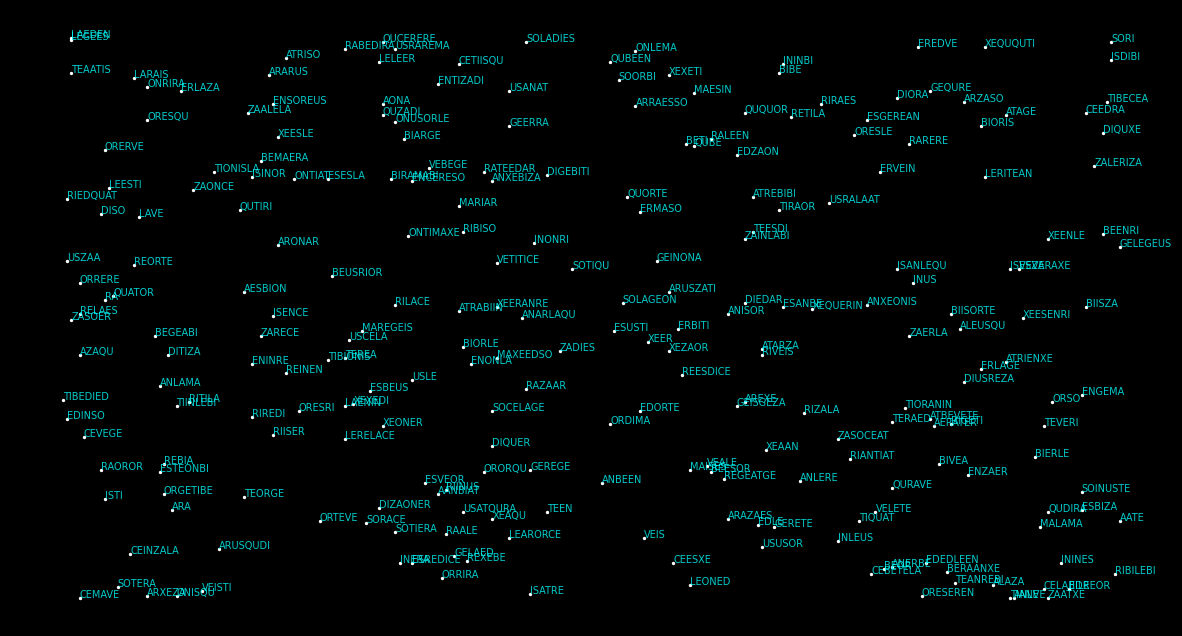

In [9]:
import matplotlib.pyplot as plt
from dataclasses import dataclass

PAIRS = ("..LEXEGEZACEBISO"
         "USESARMAINDIREA."
         "ERATENBERALAVETI"
         "EDORQUANTEISRION")

class Seed:
    def __init__(self, w0, w1, w2):
        self.w0 = w0
        self.w1 = w1
        self.w2 = w2

    def tweakseed(self):
        temp = (self.w0 + self.w1 + self.w2) & 0xFFFF
        self.w0, self.w1, self.w2 = self.w1, self.w2, temp

@dataclass
class StarSystem:
    x: int
    y: int
    economy: int
    govtype: int
    techlev: int
    population: int
    productivity: int
    radius: int
    name: str

def generate_system(seed: Seed) -> StarSystem:
    longnameflag = seed.w0 & 64

    x = seed.w1 >> 8
    y = seed.w0 >> 8

    govtype = (seed.w1 >> 3) & 7
    economy = (seed.w0 >> 8) & 7
    if govtype <= 1:
        economy |= 2

    techlev = ((seed.w1 >> 8) & 3) + (economy ^ 7)
    techlev += govtype >> 1
    if govtype & 1:
        techlev += 1

    population = 4 * techlev + economy + govtype + 1
    productivity = ((economy ^ 7) + 3) * (govtype + 4) * population * 8
    radius = 256 * (((seed.w2 >> 8) & 15) + 11) + x

    pairs = []
    for _ in range(4):
        pair = 2 * ((seed.w2 >> 8) & 31)
        seed.tweakseed()
        pairs.append(pair)

    name = (PAIRS[pairs[0]] + PAIRS[pairs[0]+1] +
            PAIRS[pairs[1]] + PAIRS[pairs[1]+1] +
            PAIRS[pairs[2]] + PAIRS[pairs[2]+1])

    if longnameflag:
        name += PAIRS[pairs[3]] + PAIRS[pairs[3]+1]

    name = name.replace('.', '')

    return StarSystem(x, y, economy, govtype, techlev, population, productivity, radius, name)

def generate_galaxy(seed_values, count=256):
    seed = Seed(*seed_values)
    systems = []

    for _ in range(count):
        system = generate_system(seed)
        systems.append(system)

    return systems

def plot_galaxy(systems):
    plt.figure(figsize=(15, 8), facecolor='black')
    for system in systems:
        plt.scatter(system.x, system.y, color='white', s=2)
        plt.text(system.x, system.y, system.name, fontsize=7, color='cyan', alpha=0.8)

    plt.gca().set_facecolor('black')
    plt.axis('off')
    plt.show()

seed_values = (0x5A4A, 0x0248, 0xB753)

galaxy = generate_galaxy(seed_values)
plot_galaxy(galaxy)


**2.5.** (уровень сложности: высокий)

Создайте генератор растений с помощью алгоритма освоения пространства (space colonization algorithm). Этот алгоритм описан в [статье](http://algorithmicbotany.org/papers/colonization.egwnp2007.large.pdf) 2007 года и позволяет моделировать различные природные явления: корни и ветви деревьев, сети рек и дорог и так далее.

Основная идея алгоритма состоит в том, чтобы разместить в некоторой области случайным образом точки притяжения. К этим точкам на каждой итерации тянутся узлы моделируемого растения или дерева. В процессе создаются ветки, а точки поглощаются.

Алгоритм содержит следующие шаги.

1. Создание N случайных точек притяжения, а также одного или нескольких начальных узлов дерева.
2. Поглощение ближайших точек притяжения – то есть тех точек, которые находятся к узлам дерева ближе, чем расстояние $d_k$.
3. Нахождение для каждой точки притяжения ближайшего к ней узла дерева $v$ на дистанции, не превышающей $d_i$. Для каждого $v$ формируется множество $S(v)$, которое может содержать несколько точек притяжения.
4. Если $S(v)$ не пусто, то формируется очередной узел $v'$ на расстоянии $D$ и создается новый сегмент $(v, v')$ с помощью следующих формул:
$$
v' = v + \hat{n}D, \hat{n} = \frac{\vec{n}}{\lVert\vec{n}\rVert},\vec{n} = \sum_{s \in S(v)} \frac{s - v}{\lVert s - v \rVert}
$$
5. Переход на шаг 2, пока не исчерпано заданное число шагов.

Для изображения сегментов используйте LineCollection из Matplotlib.

Ниже приведен пример сгенерированного растения.

![](data/plant1.png)

Растения могут расти совместно:

![](data/plant2.png)

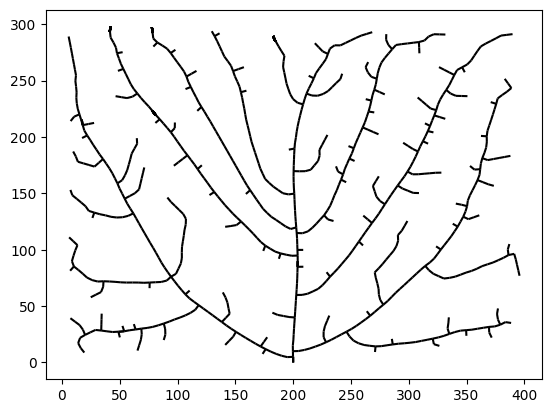

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

# Параметры алгоритма
num_attraction_points = 500  # Количество точек притяжения
growth_distance = 5  # Расстояние роста (D)
kill_distance = 10  # Расстояние поглощения (dk)
influence_distance = 50  # Радиус влияния (di)
iterations = 100  # Количество итераций

# Создаем случайные точки притяжения
width, height = 400, 300
attraction_points = np.random.rand(num_attraction_points, 2) * [width, height]

# Начальный узел дерева (из центра снизу)
nodes = np.array([[width / 2, 0]])
segments = []

for _ in range(iterations):
    if len(attraction_points) == 0:
        break

    # 1. Вычисляем расстояния от узлов к точкам притяжения
    distances = np.linalg.norm(attraction_points[:, None, :] - nodes[None, :, :], axis=2)

    # 2. Находим ближайшие узлы дерева для каждой точки притяжения
    closest_nodes = np.argmin(distances, axis=1)

    # 3. Фильтруем притяжение (точки притяжения дальше influence_distance игнорируем)
    valid_indices = np.where(np.min(distances, axis=1) < influence_distance)[0]

    if len(valid_indices) == 0:
        break

    # 4. Группируем притяжение к ближайшим узлам
    new_nodes = []
    for v in np.unique(closest_nodes[valid_indices]):
        S_v = attraction_points[closest_nodes == v]  # Все точки, притянутые к узлу v

        if len(S_v) > 0:
            direction = np.sum((S_v - nodes[v]) / np.linalg.norm(S_v - nodes[v], axis=1)[:, None], axis=0)
            direction /= np.linalg.norm(direction)  # Нормализация

            new_node = nodes[v] + direction * growth_distance  # Новый узел
            new_nodes.append(new_node)
            segments.append((nodes[v], new_node))  # Добавляем отрезок

    # 5. Добавляем новые узлы
    new_nodes = np.array(new_nodes)
    if len(new_nodes) > 0:
        nodes = np.vstack([nodes, new_nodes])  # Добавляем в массив numpy

    # 6. Удаляем точки притяжения, которые попали в kill_distance
    distances_to_new_nodes = np.linalg.norm(attraction_points[:, None, :] - new_nodes[None, :, :], axis=2)
    attraction_points = attraction_points[np.all(distances_to_new_nodes > kill_distance, axis=1)]

# Рисуем результат
fig, ax = plt.subplots()
lines = LineCollection(segments, colors='black')
ax.add_collection(lines)
ax.autoscale()
plt.show()

**2.6.** (уровень сложности: высокий)

Создайте генератор деревьев на основе алгоритма освоения пространства. Деревья должны иметь ствол и листья. Примеры автоматически сгенерированных деревьев показаны далее:

![](data/tree1.png)

![](data/tree2.png)

![](data/tree3.png)

C:\Users\mr-ki\AppData\Local\Temp\ipykernel_7496\2277670683.py:154: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


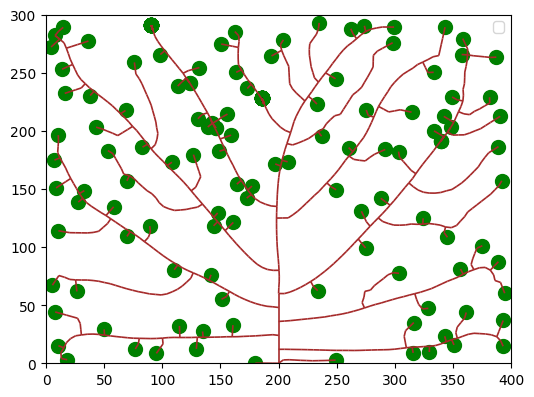

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

# ---------------------------
# ПАРАМЕТРЫ АЛГОРИТМА
# ---------------------------
num_attraction_points = 500   # Количество точек притяжения
growth_distance = 5           # Расстояние роста (D)
kill_distance = 10            # Расстояние "поглощения" (dk)
influence_distance = 50       # Радиус влияния (di)
iterations = 100              # Количество итераций

# Размеры "сцены" (области, в которой располагаются точки)
width, height = 400, 300

# ---------------------------
# СОЗДАЁМ СЛУЧАЙНЫЕ ТОЧКИ ПРИТЯЖЕНИЯ
# ---------------------------
attraction_points = np.random.rand(num_attraction_points, 2) * [width, height]

# ---------------------------
# ГЕНЕРАЦИЯ СТВОЛА
# ---------------------------
# Пускай ствол состоит из нескольких сегментов в нижней части.
num_trunk_segments = 5              # Количество сегментов ствола
trunk_height_fraction = 0.2         # Доля высоты, занимаемая стволом
trunk_height = trunk_height_fraction * height
trunk_segment_length = trunk_height / num_trunk_segments

trunk_nodes = []
trunk_segments = []

# Создаём узлы ствола от y=0 до y=trunk_height
for i in range(num_trunk_segments + 1):
    x = width / 2
    y = i * trunk_segment_length
    trunk_nodes.append([x, y])

# Создаём отрезки между узлами ствола
for i in range(num_trunk_segments):
    trunk_segments.append((trunk_nodes[i], trunk_nodes[i + 1]))

# Превращаем список в numpy-массив
trunk_nodes = np.array(trunk_nodes)

# ---------------------------
# ИНИЦИАЛИЗАЦИЯ ДЕРЕВА
# ---------------------------
# Начальные узлы дерева — это все узлы ствола.
nodes = trunk_nodes.copy()
segments = list(trunk_segments)  # начинаем с сегментов ствола

# Для удобства будем хранить индексы родителя:
# parent_index[i] = индекс узла-родителя для i-го узла
parent_index = [-1] * len(nodes)  # у ствола "родителя" нет, ставим -1

# ---------------------------
# ОСНОВНОЙ ЦИКЛ АЛГОРИТМА
# ---------------------------
for _ in range(iterations):
    if len(attraction_points) == 0:
        break

    # 1. Считаем расстояния от каждой точки притяжения до всех узлов
    #    distances.shape будет (кол_во_точек, кол_во_узлов)
    distances = np.linalg.norm(
        attraction_points[:, None, :] - nodes[None, :, :],
        axis=2
    )

    # 2. Находим ближайший узел для каждой точки притяжения
    closest_nodes = np.argmin(distances, axis=1)  # индекс ближайшего узла

    # 3. Фильтруем точки притяжения (те, что дальше influence_distance, игнорируем)
    min_distances = np.min(distances, axis=1)
    valid_indices = np.where(min_distances < influence_distance)[0]

    if len(valid_indices) == 0:
        break

    # 4. Для каждого узла собираем точки, которые к нему "притягиваются"
    new_nodes_coords = []
    new_nodes_parents = []  # запомним, от какого узла "растём"
    
    for node_idx in np.unique(closest_nodes[valid_indices]):
        # Все точки, притянутые к данному узлу node_idx
        S_v = attraction_points[closest_nodes == node_idx]
        if len(S_v) == 0:
            continue

        # Вычисляем усреднённое направление
        directions = (S_v - nodes[node_idx])
        norms = np.linalg.norm(directions, axis=1).reshape(-1, 1)
        directions_normalized = directions / norms
        direction_sum = np.sum(directions_normalized, axis=0)
        direction_unit = direction_sum / np.linalg.norm(direction_sum)

        # Создаём новый узел на расстоянии growth_distance
        new_node = nodes[node_idx] + direction_unit * growth_distance
        new_nodes_coords.append(new_node)
        new_nodes_parents.append(node_idx)

    # 5. Добавляем новые узлы к дереву
    if len(new_nodes_coords) > 0:
        new_nodes_coords = np.array(new_nodes_coords)
        start_index = len(nodes)  # индекс, с которого пойдут новые узлы
        nodes = np.vstack([nodes, new_nodes_coords])

        # Обновляем parent_index и segments
        for i, coord in enumerate(new_nodes_coords):
            p_idx = new_nodes_parents[i]
            child_idx = start_index + i
            parent_index.append(p_idx)
            segments.append((nodes[p_idx], nodes[child_idx]))

    # 6. Удаляем точки притяжения, которые попали в kill_distance к новым узлам
    if len(new_nodes_coords) > 0:
        distances_to_new = np.linalg.norm(
            attraction_points[:, None, :] - new_nodes_coords[None, :, :],
            axis=2
        )
        attraction_points = attraction_points[
            np.all(distances_to_new > kill_distance, axis=1)
        ]

# ---------------------------
# ПОИСК КОНЕЧНЫХ УЗЛОВ (ДЛЯ ЛИСТЬЕВ)
# ---------------------------
# Конечный узел — тот, у которого нет "потомков".
# Можно найти, проверив, встречается ли он в parent_index.
all_indices = set(range(len(nodes)))
has_child = set(parent_index[1:])  # пропускаем -1
end_nodes_indices = list(all_indices - has_child)

# ---------------------------
# ВИЗУАЛИЗАЦИЯ
# ---------------------------
fig, ax = plt.subplots(figsize=(6, 6))

# Рисуем ветви
lines = LineCollection(segments, colors='brown', linewidths=1.2)
ax.add_collection(lines)

# Рисуем "листья" (конечные узлы) в виде зелёных кружков
leaf_coords = nodes[end_nodes_indices]
ax.scatter(leaf_coords[:, 0], leaf_coords[:, 1],
           color='green', s=100, marker='o')

# Показываем результат
ax.set_xlim(0, width)
ax.set_ylim(0, height)
ax.set_aspect('equal', 'box')
ax.legend()
plt.show()


**2.7.** (уровень сложности: низкий)

Реализуйте функцию, которая по имени графического файла возвращает двумерный массив с помощью списков Питона, содержащий RGB-значения картинки. Эта функция понадобится для решения остальных задач этого раздела.

In [67]:
from PIL import Image
import numpy as np

def get_image_rgb_array(filename):
    """
    Открывает изображение по заданному имени файла и возвращает двумерный список,
    содержащий RGB-значения каждого пикселя.
    """
    # Открываем изображение и преобразуем его в формат RGB
    image = Image.open(filename).convert('RGB')
    width, height = image.size
    
    # Создаем двумерный список для хранения пикселей
    rgb_array = []
    
    # Проходим по всем строкам изображения
    for y in range(height):
        row = []
        for x in range(width):
            # Получаем RGB-значение пикселя в координатах (x, y)
            pixel = image.getpixel((x, y))
            row.append(pixel)
        rgb_array.append(row)
    
    return rgb_array

filename = "C:/Users/mr-ki/Desktop/6 семак/python/texture.png"
rgb_array = get_image_rgb_array(filename)

# вывод первых 5 строк и столбцов для проверки
for row in rgb_array[:5]:
    print(row[:10])

[(51, 66, 32), (51, 83, 27), (50, 82, 26), (34, 48, 21), (40, 56, 25), (48, 85, 24), (50, 86, 25), (44, 78, 22), (58, 75, 42), (53, 66, 37)]
[(66, 99, 33), (45, 59, 28), (44, 57, 29), (32, 45, 20), (44, 61, 30), (53, 90, 27), (53, 75, 35), (53, 74, 36), (49, 86, 24), (52, 65, 35)]
[(65, 93, 33), (54, 69, 42), (62, 78, 48), (53, 86, 27), (55, 72, 43), (55, 90, 28), (62, 84, 41), (54, 91, 26), (51, 88, 25), (51, 88, 25)]
[(49, 62, 30), (53, 67, 36), (54, 68, 39), (48, 77, 25), (62, 81, 46), (62, 95, 30), (56, 89, 27), (62, 99, 30), (56, 91, 27), (67, 83, 44)]
[(49, 61, 32), (59, 92, 31), (64, 95, 34), (76, 95, 56), (68, 85, 46), (64, 83, 41), (52, 72, 32), (58, 93, 28), (56, 93, 27), (60, 96, 28)]


**2.8.** (уровень сложности: средний)

Диаграммы Вороного находят широкое применение не только в математике, но и, к примеру, в архитектуре, а также в процедурной графике. Названы эти диаграммы в честь русского математика [Георгия Феодосьевича Вороного](https://www.mathnet.ru/links/bd2cf5586728b0e7a7393c5d7cc7b23d/cheb698.pdf). Для создания диаграммы Вороного необходимо выбрать множество точек и разбить плоскость (n-мерный случай рассматривать не будем) на области, для каждой из которых только одна из выбранных точек окажется ближайшей.

Мы используем диаграммы Вороного для реализации фильтра изображения. Результат фильтрации может напоминать нарисованную кистью картину или мозаику. Для получения результата необходимо выбрать N случайных точек исходного изображения и построить по ним диаграмму. 

Существуют различные алгоритмы построения диаграмм Вороного, но мы воспользуемся самым примитивным подходом – просто последуем определению и переберем все координаты изображения-результата на предмет расстояния до случайно выбранных точек исходного изображения.

Ниже показано исходное изображение:

![](data/winter1.jpg)

Результат фильтрации для N = 500:

![](data/winter2.png)

Результат фильтрации для N = 2000:

![](data/winter3.png)

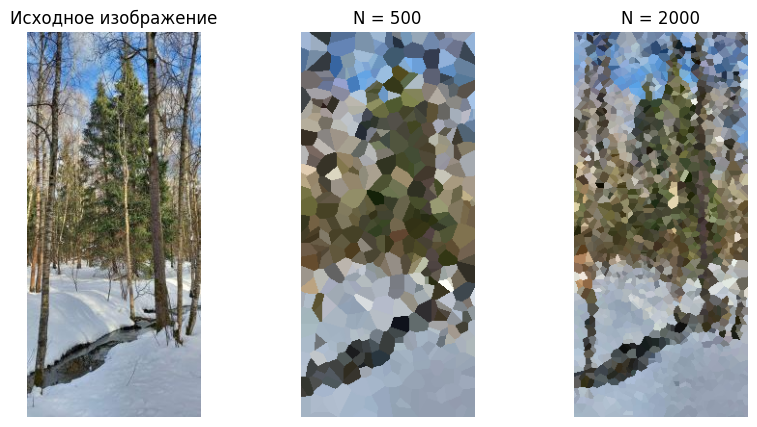

In [13]:
import random
import math
from PIL import Image
import numpy as np

def load_image_to_array(filename):
    """
    Ваша функция для загрузки изображения в двумерный список [row][col] из RGB-значений
    """
    img = Image.open(filename)
    img_array = np.array(img)
    rgb_array = img_array.tolist()
    return rgb_array

def voronoi_filter(rgb_array, n_points=500):
    """
    Простейший вариант «вороному-подобного» фильтра:
      - n_points: количество случайных центров
    """
    height = len(rgb_array)
    width = len(rgb_array[0])

    # 1) Случайно выбираем n_points центров
    #    Сохраняем координаты и соответствующие цвета
    centers = []
    for _ in range(n_points):
        # Случайная точка (r, c)
        r = random.randint(0, height - 1)
        c = random.randint(0, width - 1)
        color = rgb_array[r][c]  # RGB-цвет в этой точке
        centers.append((r, c, color))

    # 2) Создаём новый массив под результат
    result = [[None for _ in range(width)] for _ in range(height)]

    # 3) Для каждого пикселя ищем ближайший центр
    for r in range(height):
        for c in range(width):
            min_dist = float('inf')
            nearest_color = None

            for (cr, cc, center_color) in centers:
                # Можно считать квадрат расстояния, чтобы избежать sqrt()
                dist_sq = (r - cr)**2 + (c - cc)**2
                if dist_sq < min_dist:
                    min_dist = dist_sq
                    nearest_color = center_color

            result[r][c] = nearest_color

    return result

def array_to_image(voronoi_array):
    """
    Преобразует двумерный список [row][col] из RGB-значений обратно в PIL.Image
    """
    # voronoi_array имеет структуру: height x width x 3 (R,G,B)
    np_array = np.array(voronoi_array, dtype=np.uint8)
    return Image.fromarray(np_array)

# Пример использования
if __name__ == "__main__":
    filename = 'C:/Users/mr-ki/Desktop/6 семак/python/winter1.jpg'
    rgb_array = load_image_to_array(filename)

    # Применяем фильтр (число точек подберите по вкусу)
    voronoi_result_500 = voronoi_filter(rgb_array, n_points=500)
    voronoi_result_2000 = voronoi_filter(rgb_array, n_points=2000)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.title("Исходное изображение")
    plt.imshow(rgb_array)
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.title("N = 500")
    plt.imshow(voronoi_result_500)
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.title("N = 2000")
    plt.imshow(voronoi_result_2000)
    plt.axis('off')
    plt.show()


**2.9.** (уровень сложности: хакер)

Ускорьте фильтрацию с помощью диаграмм Вороного не меня принципиально алгоритм и не используя сторонние библиотеки.

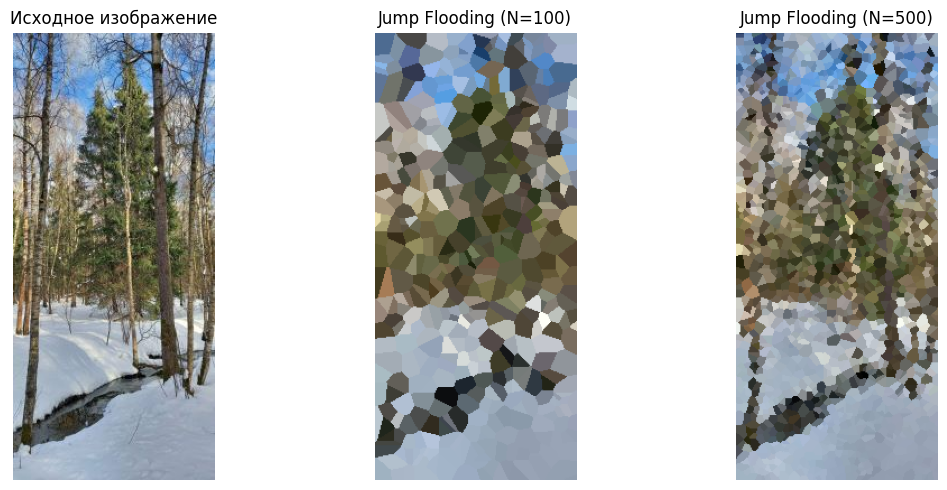

In [14]:
import random
import math
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def load_image_to_array(filename):
    """
    Функция для загрузки изображения в двумерный список [row][col] из RGB-значений
    """
    img = Image.open(filename)
    img_array = np.array(img)
    # Преобразуем в обычные списки (если нужно), иначе можно работать и с NumPy-массивом напрямую
    return img_array.tolist()

def jump_flood_voronoi_filter(rgb_array, n_points=100):
    """
    Применение Jump Flooding Algorithm для построения
    мозаики в стиле диаграммы Вороного.
    
    :param rgb_array: двумерный список (height x width x 3)
    :param n_points: количество случайных центров
    :return: двумерный список (такого же размера), где
             каждый пиксель заменён цветом ближайшего центра
    """
    height = len(rgb_array)
    width = len(rgb_array[0])
    
    # 1) Случайно выбираем n_points центров
    #    Сохраняем их координаты (r, c)
    seeds = []
    for _ in range(n_points):
        r = random.randint(0, height - 1)
        c = random.randint(0, width - 1)
        seeds.append((r, c))
    
    # 2) Инициализация массивов:
    # site_coord[r][c] хранит (r_центра, c_центра)
    # dist[r][c] хранит квадрат расстояния до этого центра
    INF = float('inf')
    site_coord = [[(-1, -1) for _ in range(width)] for _ in range(height)]
    dist = [[INF for _ in range(width)] for _ in range(height)]
    
    # Для самих центров расстояние = 0, координаты = свои
    for (sr, sc) in seeds:
        site_coord[sr][sc] = (sr, sc)
        dist[sr][sc] = 0
    
    # 3) Jump Flooding:
    #    Число проходов = ~ log2(max(width, height))
    passes = int(math.ceil(math.log2(max(width, height))))
    
    # Описываем 8 направлений для поиска
    neighbors_8 = [(-1, 0), (1, 0), (0, -1), (0, 1),
                   (-1, -1), (-1, 1), (1, -1), (1, 1)]
    
    for p in range(passes):
        # Размер "шага"
        d = 2 ** (passes - 1 - p)
        
        # Обходим все пиксели
        for r in range(height):
            for c in range(width):
                # Проверяем 8 соседей на расстоянии d
                for (dr, dc) in neighbors_8:
                    rr = r + dr * d
                    cc = c + dc * d
                    if 0 <= rr < height and 0 <= cc < width:
                        # Смотрим, какой центр хранит сосед
                        sc_r, sc_c = site_coord[rr][cc]
                        if sc_r == -1 and sc_c == -1:
                            # У соседа нет центра, пропускаем
                            continue
                        # Проверяем, не улучшит ли этот центр наше расстояние
                        dsq = (r - sc_r)**2 + (c - sc_c)**2
                        if dsq < dist[r][c]:
                            dist[r][c] = dsq
                            site_coord[r][c] = (sc_r, sc_c)
    
    # 4) Формируем итоговое изображение:
    #    Каждый пиксель берёт цвет из rgb_array в координатах
    #    своего ближайшего центра
    result = [[None for _ in range(width)] for _ in range(height)]
    for r in range(height):
        for c in range(width):
            cr, cc = site_coord[r][c]
            result[r][c] = rgb_array[cr][cc]  # цвет из исходного изображения
    
    return result

def array_to_image(array_2d):
    """
    Преобразует двумерный список [row][col] из RGB-значений обратно в PIL.Image
    """
    np_array = np.array(array_2d, dtype=np.uint8)
    return Image.fromarray(np_array)

if __name__ == "__main__":
    # Пример использования
    filename = "C:/Users/mr-ki/Desktop/6 семак/python/winter1.jpg"  # Укажите путь к файлу
    rgb_array = load_image_to_array(filename)
    
    # Применяем JFA-фильтр с разным числом центров
    jfa_100 = jump_flood_voronoi_filter(rgb_array, n_points=500)
    jfa_500 = jump_flood_voronoi_filter(rgb_array, n_points=2000)
    
    # Отображаем результаты
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 3, 1)
    plt.title("Исходное изображение")
    plt.imshow(np.array(rgb_array, dtype=np.uint8))
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.title("Jump Flooding (N=100)")
    plt.imshow(np.array(jfa_100, dtype=np.uint8))
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.title("Jump Flooding (N=500)")
    plt.imshow(np.array(jfa_500, dtype=np.uint8))
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()


**2.10.** (уровень сложности: средний)

Реализуйте простой [алгоритм](https://github.com/s-macke/VoxelSpace) трехмерной визуализации воксельных ландшафтов на основе текстуры и карты высот.

Исходные данные: [текстура](data/texture.png), [карта высот](data/heightmap.png).

Идея алгоритма заключается в послойном сканировании, одна горизонтальная линия за другой, значений из текстуры с учетом дистанции от камеры, и размещении на экране каждой точки слоя в виде столбца, высота которого извлекается из карты высот, а цвет – из текстуры.


Изобразите на текстуре область обзора, охватываемого камерой. Для этого потребуется знать координаты камеры (x, y), ширину зкрана (screen_width) и глубину обзора (z):

![](data/voxel_info.png)

Сканирование начинайте от наиболее удаленного от камеры слоя.

Пример (x = 500, y = 900, screen_width = 64, z = 400):

![](data/voxel1.png)

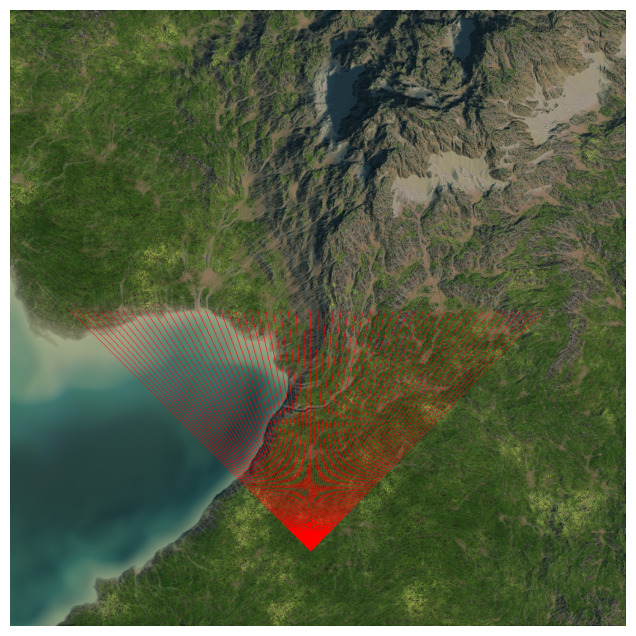

In [65]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def mark_view_in_texture_plot(texture_path, x, y, screen_width, z, color=(255, 0, 0)):
    """
    Открывает изображение texture_path, наносит на него "треугольник обзора"
    от камеры (x, y) с глубиной z и шириной screen_width,
    а затем отображает результат через matplotlib.
    
    Параметры:
      texture_path   : путь к файлу изображения (текстуры)
      x, y           : координаты камеры (в пикселях текстуры)
      screen_width   : число "вертикальных столбцов" (горизонтальное разрешение обзора)
      z              : глубина обзора (сколько пикселей вверх/вперёд от камеры)
      color          : цвет, которым закрашивается область (по умолчанию красный)
    """
    # 1) Загружаем текстуру и преобразуем в массив NumPy
    texture = Image.open(texture_path).convert('RGB')
    texture_array = np.array(texture, dtype=np.uint8)  # shape: (height, width, 3)
    height, width, _ = texture_array.shape

    # 2) «Подсвечиваем» область обзора, идя от дальнего слоя (z) к ближнему (0)
    for dist in range(z, -1, -1):
        row = y - dist  # идём «вверх» по y
        if row < 0 or row >= height:
            continue
        
        x_start = x - dist
        x_end   = x + dist
        
        # Проверка, что слой не выходит за границы целиком
        if x_end < 0 or x_start >= width:
            continue
        
        # Шаг по горизонтали: делим [x_start; x_end] на screen_width «колонок»
        dx = (x_end - x_start) / float(screen_width)
        
        for col in range(screen_width):
            x_col = x_start + col * dx
            x_col_int = int(round(x_col))
            
            # Закрашиваем пиксель, если он попадает внутрь картинки
            if 0 <= x_col_int < width:
                texture_array[row, x_col_int] = color

    # 3) Выводим результат через matplotlib
    plt.figure(figsize=(8, 8))
    plt.imshow(texture_array)
    plt.axis('off')  # Убираем подписи осей
    plt.show()

# Пример использования
if __name__ == "__main__":
    mark_view_in_texture_plot(
        texture_path="C:/Users/mr-ki/Desktop/6 семак/python/texture.png",
        x=500,
        y=900,
        screen_width=64,
        z=400,
        color=(255, 0, 0)  # красный цвет
    )


texture = load_image_to_array("C:/Users/mr-ki/Desktop/6 семак/python/texture.png")
heightmap = load_image_to_array("C:/Users/mr-ki/Desktop/6 семак/python/heightmap.png")

**2.11.** (уровень сложности: средний)

Изобразите текстуру в трехмерном пространстве, используя за основу алгоритм, реализованный в предыдущей задаче. Вам потребуется написать функцию для изображения вертикальных линий. Как и ранее, используйте алгоритм художника – то есть начинайте рисовать от наиболее отдаленных слоев. Цвет линии извлекается из текстуры, а высота текстуры масштабируется с учетом z и переменной, задающей положение горизонта (horizon).

Пример:

![](data/voxel2.png)

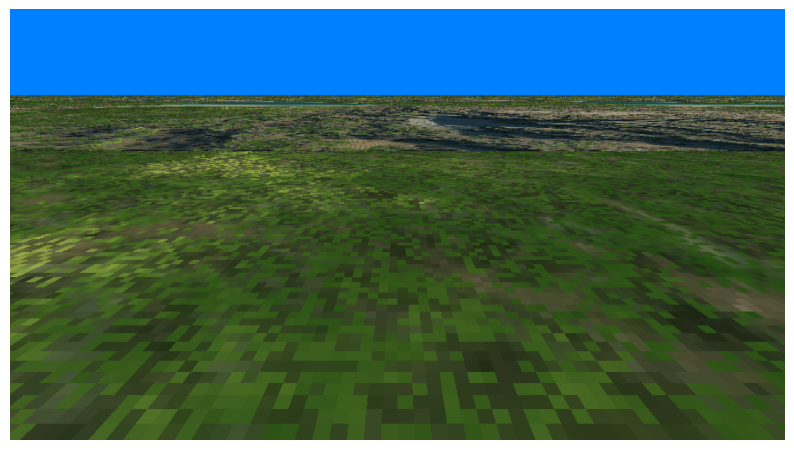

In [20]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def render_3d_texture_like_example(
    texture_path,
    screen_width=800,
    screen_height=450,
    horizon=100,
    camera_x=0,
    camera_y=0,
    camera_height=32,
    focal_length=300,
    sky_color=(0, 128, 255)
):
    texture = Image.open(texture_path).convert('RGB')
    texture_array = np.array(texture, dtype=np.uint8)
    tex_h, tex_w, _ = texture_array.shape

    canvas = np.zeros((screen_height, screen_width, 3), dtype=np.uint8)
    sky_r, sky_g, sky_b = sky_color
    canvas[:horizon, :, 0] = sky_r
    canvas[:horizon, :, 1] = sky_g
    canvas[:horizon, :, 2] = sky_b

    for row in range(horizon, screen_height):
        row_dist = (row - horizon)
        if row_dist == 0:
            row_dist = 1

        # "Глубина" z
        z = (camera_height * focal_length) / row_dist

        # Для всех столбцов сразу
        cols = np.arange(screen_width)
        col_offset = (cols - screen_width/2) * (z / focal_length)
        tex_x = (camera_x + col_offset).astype(int) % tex_w

        # !!! Здесь заменяем .astype(int) на обычное int()
        #    поскольку (camera_y + z) — одно число float
        tex_y = int(camera_y + z) % tex_h

        # Берём цвета из текстуры
        row_colors = texture_array[tex_y, tex_x]

        canvas[row, :] = row_colors

    plt.figure(figsize=(10, 6))
    plt.imshow(canvas)
    plt.axis('off')
    plt.show()


# Пример использования
if __name__ == "__main__":
    # Подставьте свой путь к текстуре
    texture_path = "C:/Users/mr-ki/Desktop/6 семак/python/texture.png"

    # Параметры можно менять, чтобы добиться нужного «вида» сцены
    render_3d_texture_like_example(
        texture_path,
        screen_width=900,    
        screen_height=500,   
        horizon=100,         
        camera_x=500,        
        camera_y=900,       
        camera_height=20,    
        focal_length=400,    
        sky_color=(0, 128, 255) 
    )


**2.12.** (уровень сложности: средний)

Изобразите трехмерный ландшафт с использованием доработанного алгоритма из предыдущей задачи. Теперь необходимо задавать высоту вертикальных линий, учитывая карту высот.

Пример:

![](data/voxel3.png)

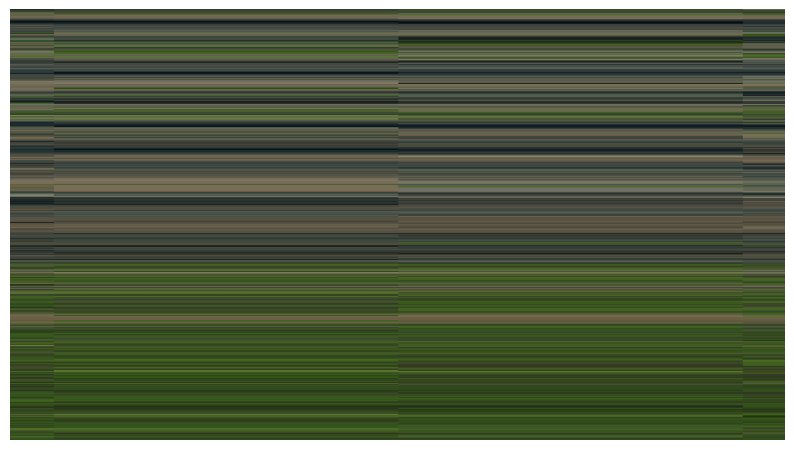

In [29]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def render_3d_landscape_with_height_map(
    texture_path,
    height_map_path,
    screen_width=900,
    screen_height=500,
    horizon=250,
    camera_x=0,
    camera_y=0,
    camera_height=32,
    focal_length=400,
    sky_color=(135, 206, 235),
    max_depth=800,
    depth_step=1,
    angle_degs=90.0
):
    """
    angle_degs=90 означает, что камера смотрит «вверх» по оси Y.
    Можете менять угол, чтобы «повернуть» направление обзора.
    """

    # 1) Загружаем текстуру и карту высот
    texture = Image.open(texture_path).convert('RGB')
    texture_array = np.array(texture, dtype=np.uint8)
    tex_h, tex_w, _ = texture_array.shape

    height_map = Image.open(height_map_path).convert('L')
    height_array = np.array(height_map, dtype=np.uint8)
    hmap_h, hmap_w = height_array.shape

    # 2) Подготовим холст: сверху заливаем небо
    canvas = np.zeros((screen_height, screen_width, 3), dtype=np.uint8)
    sky_r, sky_g, sky_b = sky_color
    canvas[:horizon, :, 0] = sky_r
    canvas[:horizon, :, 1] = sky_g
    canvas[:horizon, :, 2] = sky_b

    # 3) Буфер для хранения "верхней границы" отрисованной земли
    y_buffer = np.full(screen_width, screen_height, dtype=np.int32)

    # Массив столбцов (от 0 до screen_width-1)
    cols = np.arange(screen_width)

    # 4) Считаем вектор направления камеры (dx, dy) и «боковой» вектор (sx, sy)
    angle = np.radians(angle_degs)  # переводим градусы в радианы
    # Если angle=0°, смотрим вдоль оси X; angle=90° => вдоль оси Y
    dx = np.cos(angle)
    dy = np.sin(angle)
    # Перпендикулярный вектор «вбок»
    sx = -dy
    sy = dx

    # 5) Основной цикл по глубине (z)
    for z in range(1, max_depth, depth_step):
        # Смещение «вбок» для каждого столбца (учитываем перспективу: z/focal_length)
        side_offset_x = (cols - screen_width/2) * sx * (z / focal_length)
        side_offset_y = (cols - screen_width/2) * sy * (z / focal_length)

        # Смещение «вперёд» (камера смотрит на угол angle)
        forward_offset_x = dx * z
        forward_offset_y = dy * z

        # Мировые координаты для каждого столбца
        world_x = camera_x + side_offset_x + forward_offset_x
        world_y = camera_y + side_offset_y + forward_offset_y

        # Индексы для текстуры и карты высот
        tex_x = world_x.astype(int) % tex_w
        hmap_x = world_x.astype(int) % hmap_w
        hmap_y = world_y.astype(int) % hmap_h

        # Значение высоты из карты
        ground_heights = height_array[hmap_y, hmap_x].astype(np.float32)

        # Проекция высоты (с перспективой)
        proj_y = horizon - ((ground_heights - camera_height) * focal_length / z)
        proj_y = proj_y.astype(np.int32)

        # 6) Отрисовка «вертикальных» сегментов
        mask = proj_y < y_buffer
        cols_to_draw = np.where(mask)[0]
        for col in cols_to_draw:
            y_top = proj_y[col]
            y_bottom = y_buffer[col]
            if y_top < 0:
                y_top = 0
            if y_top >= y_bottom:
                continue

            segment_height = y_bottom - y_top
            ys = np.arange(y_top, y_bottom)

            # Линейная интерполяция для выбора пикселей текстуры
            tex_ys = ((ys - y_top) / segment_height * tex_h).astype(int) % tex_h
            column_colors = texture_array[tex_ys, tex_x[col]]

            # Заполняем сегмент
            canvas[y_top:y_bottom, col] = column_colors
            # Обновляем буфер
            y_buffer[col] = y_top

    # 7) Выводим результат
    plt.figure(figsize=(10, 6))
    plt.imshow(canvas)
    plt.axis('off')
    plt.show()

# Пример использования
if __name__ == "__main__":
    # Подставьте пути к файлам текстуры и карты высот
    texture_path = "C:/Users/mr-ki/Desktop/6 семак/python/texture.png"
    height_map_path = "C:/Users/mr-ki/Desktop/6 семак/python/heightmap.png"

    render_3d_landscape_with_height_map(
        texture_path,
        height_map_path,
        screen_width=900,       # ширина экрана
        screen_height=500,      # высота экрана
        horizon=250,            # положение горизонта
        camera_x=500,           # позиция камеры по X
        camera_y=900,           # позиция камеры по Y
        camera_height=20,       # высота камеры
        focal_length=400,       # "фокусное расстояние"
        sky_color=(135, 206, 235),
        max_depth=800,
        depth_step=1,
        angle_degs=90.0         # угол, под которым "смотрит" камера (90° = вдоль оси Y)
    )


**2.13.** (уровень сложности: высокий)

Ускорьте визуализацию трехмерного ландшафта из предыдущей задачи. Идея: начинайте рисование от ближайшего слоя и храните текущую строку со значениями высот, чтобы не перерисовывать то, что находится за пределами видимости.

**2.14.** (уровень сложности: высокий)

Создайте генератор текстур и карт высот. Для этого можно, к примеру, использовать метод фрактального шума из практического занятия №1.

Простой пример:

![](data/voxel4.jpg)


**2.15.** (уровень сложности: хакер)

Реализуйте анимацию полета по трехмерному ландшафту, добейтесь приемлемой частоты кадров в секунду.

## 3. Инфографика

Проанализируйте данные, полученные от ЦАП. Для этого можно воспользоваться приведенным ниже кодом.

```Python
import csv
import datetime


def parse_time(text):
    return datetime.datetime.strptime(text, '%Y-%m-%d %H:%M:%S.%f')


def load_csv(filename):
    with open(filename, encoding='utf8') as f:
        return list(csv.reader(f, delimiter=','))


# Сообщения, присланные в ЦАП.
# id, task, variant, group, time
messages = load_csv('messages.csv')

# Результаты проверок сообщений, присланных в ЦАП.
# id, message, time, status
checks = load_csv('checks.csv')

# Состояния задач ЦАП.
# task, variant, group, time, status, achievements
statuses = load_csv('statuses.csv')

# Таблица соответствия номеров групп и их названий.
# id, title
groups = load_csv('groups.csv')

# О статусах см. https://github.com/kispython-ru/dta/blob/main/webapp/models.py#L44-L50
```

С помощью графиков ответьте на следующие вопросы.

**3.1.** (уровень сложности: средний)

Как по дням недели распределяется активность студентов?

**3.2.** (уровень сложности: средний)

Как по времени суток распределяется активность студентов?

**3.3.** (уровень сложности: средний)

Сколько сообщений в среднем студенты отправляют по каждой задаче?

**3.4.** (уровень сложности: высокий)

Как за период с начала семестра менялась активность студентов по каждой из задач?

**3.5.** (уровень сложности: средний)

В каких группах было отправлено больше всего сообщений?

**3.6.** (уровень сложности: средний)

В каких группах было получено больше всего правильных решений? 

**3.7.** (уровень сложности: средний)

Какие задачи оказались самыми легкими, самыми сложными?

**3.8.** (уровень сложности: средний)

Студенты каких групп заработали больше всего достижений? 

**3.9.** (уровень сложности: средний)

Кто находится на первых 10 местах в рейтинге студентов?

**3.10.** (уровень сложности: средний)

В каких группах студенты чаще решают задачи различными способами?


Проанализируйте [базу данных](https://github.com/Newbilius/Old-Games_DOS_Game_Gauntlet/blob/master/GAMES.csv) старых компьютерных игр.

С помощью графиков ответьте на следующие вопросы:

**3.11.** (уровень сложности: средний)

Какие годы были самыми популярными с точки зрения выхода игр?

**3.12.** (уровень сложности: средний)

Какие жанры были популярны в различные периоды времени?